# Question 2  Single Loan

This notebook aim is twfold:

(1) Explore the data in the simple case of a single loan

(2) Perform the operation required by Question 2 (below) in the case of a single loan. This allows us to get clarity and check that the operations are correct in a simpler context. This will also help us for scaling, since once we have entire portfolio we can divide the work in individual task (one per-loan).


**Question 2**

Please add the following calculated columns to the dataframe (plus any others you found helpful). 

Dynamic Columns (These vary by loan and by calendar month):

- current_balance: The current balance outstanding for each loan and month.
- seasoning: The integer number of months since the loan was originated at each month.
- n_missed_payments: number of missed payments in a row.
- prepaid_in_month: a flag indicating that the borrower prepaid in a given month.
- default_in_month: a flag indicating that the borrower defaulted in a given month.
- recovery_in_month: a flag indicating that a recovery has been made post-default in a given month.
- is_recovery_payment: a flag indicating whether the associated payment has been made post-default.
- time_to_reversion: The integer number of months until the laon reverts. This is negative if the - loan is before reversion and 0 at the month of reversion.
- is_post_seller_purchsae_date: Is this time period after the seller purchased this loan.

In [2]:
import pandas as pd
from case_functions import consolidate_data

In [3]:
pd.options.display.float_format = "{:,.2f}".format
pd.options.mode.copy_on_write = True

In [4]:
df = consolidate_data(loan_id = 1606)

In [5]:
df.head()

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin
41738,1606,2021-11-30,"215,105.00",NaN,NaN,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02


In [6]:
df['Payment_Made'] = df['Payment_Made'].fillna(0)

In [7]:
df['payment_made_cumsum'] = df['Payment_Made'].cumsum()

In [8]:
df['current_balance'] = df['original_balance'] - df['payment_made_cumsum']

In [9]:
df['level_1'] - df['origination_date']  # This give us days

41738     0 days
41739    31 days
41740    62 days
41741    90 days
41742   121 days
41743   151 days
41744   182 days
41745   212 days
41746   243 days
41747   274 days
41748   304 days
41749   335 days
41750   365 days
41751   396 days
dtype: timedelta64[ns]

In [10]:
df['seasoning'] = df['level_1'].dt.to_period('M').astype(int) - df['origination_date'].dt.to_period('M').astype(int)

Question/Assumption

- I am going to assume that a payment which is not zero but less than the amount due is a missed payment.
- There is only 1 instance this happens.


In [11]:
df['missed_payment'] = df['Payment_Due'] > df['Payment_Made']

In [12]:
df['not_missed'] = ~df['missed_payment']

In [13]:
df['n_missed_payments'] = df['missed_payment'].groupby((~df['missed_payment']).cumsum()).cumsum()

- prepaid_in_month: a flag indicating that the borrower prepaid in a given month.

Prepayment: The full and early prepayment of a mortgage.

In [14]:

df['prepaid_in_month'] = (df['Payment_Due'] < df['Payment_Made']) & (df['Balance'] == 0)


In [17]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin,payment_made_cumsum,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,0.00,"215,105.00",0,False,True,0,False
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,543.95,"214,561.05",1,False,True,0,False
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"1,087.91","214,017.09",2,False,True,0,False
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"1,631.86","213,473.14",3,False,True,0,False
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"1,631.86","213,473.14",4,True,False,1,False
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"2,719.77","212,385.23",5,False,True,0,False
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"3,263.73","211,841.27",6,False,True,0,False
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"3,807.68","211,297.32",7,False,True,0,False
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"3,807.68","211,297.32",8,True,False,1,False
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,0.03,0.02,"3,807.68","211,297.32",9,True,False,2,False


- default_in_month: a flag indicating that the borrower defaulted in a given month.
- Default: The borrower misses three payments in a row. Borrowers cannot be cured from defaults.

In [18]:
df['default_in_month'] = (df.n_missed_payments == 3)

In [19]:
df['defaulted'] = df.default_in_month.cumsum() 

In [20]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,post_reversion_boe_margin,payment_made_cumsum,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,0.00,"215,105.00",0,False,True,0,False,False,0
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,543.95,"214,561.05",1,False,True,0,False,False,0
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"1,087.91","214,017.09",2,False,True,0,False,False,0
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"1,631.86","213,473.14",3,False,True,0,False,False,0
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"1,631.86","213,473.14",4,True,False,1,False,False,0
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"2,719.77","212,385.23",5,False,True,0,False,False,0
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,263.73","211,841.27",6,False,True,0,False,False,0
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,807.68","211,297.32",7,False,True,0,False,False,0
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,807.68","211,297.32",8,True,False,1,False,False,0
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0.02,"3,807.68","211,297.32",9,True,False,2,False,False,0


- recovery_in_month: a flag indicating that a recovery has been made post-default in a given month.

- Recovery: Any payments made post being flagged as default.

In [23]:
df['recovery_in_month'] = (df.defaulted) * (df.Payment_Made)

In [24]:
df['is_recovery_payment'] = (df.defaulted ==True) & (df.Payment_Made > 0)

In [25]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month,is_recovery_payment
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"215,105.00",0,False,True,0,False,False,0,0.00,False
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"214,561.05",1,False,True,0,False,False,0,0.00,False
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"214,017.09",2,False,True,0,False,False,0,0.00,False
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"213,473.14",3,False,True,0,False,False,0,0.00,False
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"213,473.14",4,True,False,1,False,False,0,0.00,False
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,"212,385.23",5,False,True,0,False,False,0,0.00,False
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,841.27",6,False,True,0,False,False,0,0.00,False
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,297.32",7,False,True,0,False,False,0,0.00,False
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,297.32",8,True,False,1,False,False,0,0.00,False
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,"211,297.32",9,True,False,2,False,False,0,0.00,False


- time_to_reversion: The integer number of months until the loan reverts. 
- This is negative if the - loan is before reversion and 0 at the month of reversion.

In [26]:
df['time_to_reversion'] = df['level_1'].dt.to_period('M').astype(int) - df['reversion_date'].dt.to_period('M').astype(int)

- is_post_seller_purchsae_date: Is this time period after the seller purchased this loan.

In [27]:
df[['level_1', 'investor_1_acquisition_date']]

,level_1,investor_1_acquisition_date
41738,2021-11-30,2021-11-30
41739,2021-12-31,2021-11-30
41740,2022-01-31,2021-11-30
41741,2022-02-28,2021-11-30
41742,2022-03-31,2021-11-30
41743,2022-04-30,2021-11-30
41744,2022-05-31,2021-11-30
41745,2022-06-30,2021-11-30
41746,2022-07-31,2021-11-30
41747,2022-08-31,2021-11-30


In [28]:
df['is_post_seller_purchsae_date'] = (df['level_1'] > df['investor_1_acquisition_date'])
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-24,False
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-23,True
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-22,True
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-21,True
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,True,False,1,False,False,0,0.00,False,-20,True
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-19,True
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-18,True
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,False,True,0,False,False,0,0.00,False,-17,True
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,True,False,1,False,False,0,0.00,False,-16,True
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,True,False,2,False,False,0,0.00,False,-15,True


In [29]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [30]:
df.current_balance

41738   215,105.00
41739   214,561.05
41740   214,017.09
41741   213,473.14
41742   213,473.14
41743   212,385.23
41744   211,841.27
41745   211,297.32
41746   211,297.32
41747   211,297.32
41748   211,297.32
41749   211,297.32
41750   211,297.32
41751    81,631.34
Name: current_balance, dtype: float64

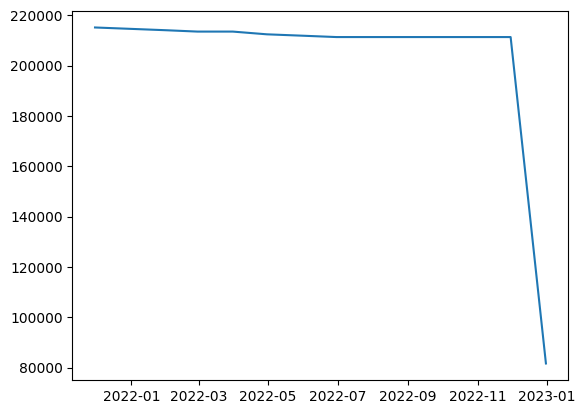

In [31]:
plt.plot(df.level_1, df.current_balance)
plt.show()


## Static Columns 

These vary by loan but are the same for each calendar month:

- postdefault_recoveries: The cumulative recoveries post-default.
- prepayment_date: The date that the loan prepays (or nan if it does not).
- date_of_default: the date that the loan defaults (or nan if it does not).
- date_of_recovery: the date that a recovery is made on the loan, post-default.
- exposure_at_default: the current balance of the loan outstanding at default.
- recovery_percent: the postdefault_recoveries as a percentage of the exposure at default.

In [34]:
df[['level_1', 'recovery_in_month']]

,level_1,recovery_in_month
41738,2021-11-30,0.00
41739,2021-12-31,0.00
41740,2022-01-31,0.00
41741,2022-02-28,0.00
41742,2022-03-31,0.00
41743,2022-04-30,0.00
41744,2022-05-31,0.00
41745,2022-06-30,0.00
41746,2022-07-31,0.00
41747,2022-08-31,0.00


In [35]:
postdefault_recoveries = sum(df['recovery_in_month'])
postdefault_recoveries

129665.974762305

In [36]:
df['postdefault_recoveries'] = postdefault_recoveries

- prepayment_date: The date that the loan prepays (or nan if it does not).

In [37]:
df[['level_1', 'prepaid_in_month']]

,level_1,prepaid_in_month
41738,2021-11-30,False
41739,2021-12-31,False
41740,2022-01-31,False
41741,2022-02-28,False
41742,2022-03-31,False
41743,2022-04-30,False
41744,2022-05-31,False
41745,2022-06-30,False
41746,2022-07-31,False
41747,2022-08-31,False


In [38]:
type(df[df.prepaid_in_month == True]['level_1'])

pandas.core.series.Series

In [40]:
prepayment_date = df[df.prepaid_in_month == True]['level_1'].item()
prepayment_date

Timestamp('2022-12-31 00:00:00')

In [41]:
df['prepayment_date']=prepayment_date

TODO: IS THIS A PREPAYMENT IF DEFAULTED?

- date_of_default: the date that the loan defaults (or nan if it does not).

In [42]:
df[['level_1','Payment_Due' ,'Payment_Made', 'current_balance' ,'default_in_month', 'defaulted',  'Balance']]

,level_1,Payment_Due,Payment_Made,current_balance,default_in_month,defaulted,Balance
41738,2021-11-30,NaN,0.00,"215,105.00",False,0,"215,105.00"
41739,2021-12-31,543.95,543.95,"214,561.05",False,0,"215,105.00"
41740,2022-01-31,543.95,543.95,"214,017.09",False,0,"215,105.00"
41741,2022-02-28,543.95,543.95,"213,473.14",False,0,"215,105.00"
41742,2022-03-31,543.95,0.00,"213,473.14",False,0,"215,105.00"
41743,2022-04-30,543.95,"1,087.91","212,385.23",False,0,"215,105.00"
41744,2022-05-31,543.95,543.95,"211,841.27",False,0,"215,105.00"
41745,2022-06-30,543.95,543.95,"211,297.32",False,0,"215,105.00"
41746,2022-07-31,543.95,0.00,"211,297.32",False,0,"215,105.00"
41747,2022-08-31,543.95,0.00,"211,297.32",False,0,"215,105.00"


In [43]:
date_of_default = df[df.default_in_month == True]['level_1'].item()
date_of_default

Timestamp('2022-09-30 00:00:00')

In [44]:
df['date_of_default'] = date_of_default

- `exposure_at_default`: the current balance of the loan outstanding at default.

In [46]:
exposure_at_default = df[df.default_in_month == True]['current_balance'].item()
exposure_at_default

211297.31757041108

In [47]:
df['exposure_at_default'] = exposure_at_default

- `recovery_percent`: the postdefault_recoveries as a percentage of the exposure at default.

In [48]:
recovery_percent = postdefault_recoveries/exposure_at_default
recovery_percent

0.6136659767064773

In [49]:
df['recovery_percent'] = recovery_percent

In [50]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,defaulted,recovery_in_month,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,postdefault_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent
41738,1606,2021-11-30,"215,105.00",NaN,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-24,False,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41739,1606,2021-12-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-23,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41740,1606,2022-01-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-22,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41741,1606,2022-02-28,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-21,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41742,1606,2022-03-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-20,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41743,1606,2022-04-30,"215,105.00",543.95,"1,087.91",2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-19,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41744,1606,2022-05-31,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-18,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41745,1606,2022-06-30,"215,105.00",543.95,543.95,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-17,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41746,1606,2022-07-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-16,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
41747,1606,2022-08-31,"215,105.00",543.95,0.00,2021-11-30,2021-11-30,2023-11-30,215105,2,...,0,0.00,False,-15,True,"129,665.97",2022-12-31,2022-09-30,"211,297.32",0.61
